# Weight Initializations

## Zeros Are Bad
In general we should never initialize the weights of our network to be all zeros.

$$
W = \vec{0}
$$

Because when the network starts training, all neurons are practically doing same thing and all weights will receive identical updates, which greatly reduces the power of a neural network.

## Normally Distributed
One of the naive approaches is to use small randoms that are normally distributed, e.g. guassian random numbers with zero mean and $10^{-2}$ standard deviations


```python
W = 0.01 * np.random.randn(fan_in, fan_out)
```

Glossary: `fan_in` is the a term that defines the maximum number of inputs that a system can accept. `fan_out` is a term that defines the maximum number of inputs that the output of a system can feed to other systems. 

In [1]:
import numpy as np


def forward_prop(hidden_layer_sizes, weight_init_func):
    """This is a simple experiment on showing how weight initialization can impact activation through deep layers
    """
    # Extract the first hidden layer dimension
    h1_dim = hidden_layer_sizes[0]

    # Randomly initialize 1000 inputs
    inputs = np.random.randn(1000, h1_dim)

    nonlinearities = ['tanh'] * len(hidden_layer_sizes)
    act_func = {
        'relu': lambda x: np.maximum(0, x),
        'tanh': lambda x: np.tanh(x)
    }

    hidden_layer_acts = dict()

    for i in range(len(hidden_layer_sizes)):
        if i == 0:
            X = inputs
        else:
            X = hidden_layer_acts[i - 1]

        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]

        W = weight_init_func(fan_in, fan_out)
        H = np.dot(X, W)
        H = act_func[nonlinearities[i]](H)

        hidden_layer_acts[i] = H

    hidden_layer_means = [np.mean(H) for i, H in hidden_layer_acts.items()]
    hidden_layer_stds = [np.std(H) for i, H in hidden_layer_acts.items()]

    return hidden_layer_acts, hidden_layer_means, hidden_layer_stds


def small_random_init(fan_in, fan_out):
    return 0.01 * np.random.randn(fan_in, fan_out)


hidden_layer_sizes = [500] * 10
hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, small_random_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))

Hidden layer 1 had mean -0.000139 and std 0.213260
Hidden layer 2 had mean 0.000038 and std 0.047572
Hidden layer 3 had mean 0.000006 and std 0.010630
Hidden layer 4 had mean -0.000002 and std 0.002386
Hidden layer 5 had mean 0.000001 and std 0.000535
Hidden layer 6 had mean -0.000000 and std 0.000119
Hidden layer 7 had mean -0.000000 and std 0.000027
Hidden layer 8 had mean 0.000000 and std 0.000006
Hidden layer 9 had mean -0.000000 and std 0.000001
Hidden layer 10 had mean -0.000000 and std 0.000000


Notice that when we have a 10-layer deep network, all activations approach zero at the end with this set of initialization. Well, how about increase the standard deviation?

Hidden layer 1 had mean -0.000385 and std 0.982053
Hidden layer 2 had mean 0.001082 and std 0.981789
Hidden layer 3 had mean 0.001913 and std 0.981715
Hidden layer 4 had mean -0.002010 and std 0.981523
Hidden layer 5 had mean 0.000435 and std 0.981463
Hidden layer 6 had mean 0.001119 and std 0.981712
Hidden layer 7 had mean -0.000742 and std 0.981718
Hidden layer 8 had mean -0.001431 and std 0.981858
Hidden layer 9 had mean 0.000313 and std 0.981687
Hidden layer 10 had mean -0.001314 and std 0.981719


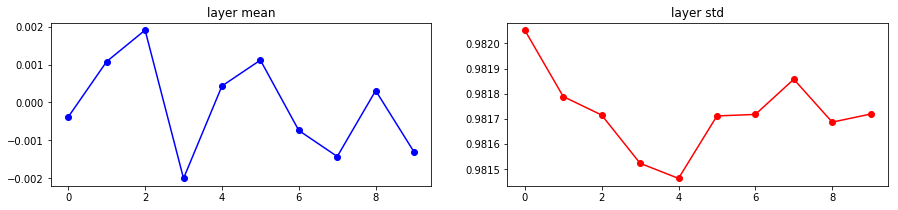

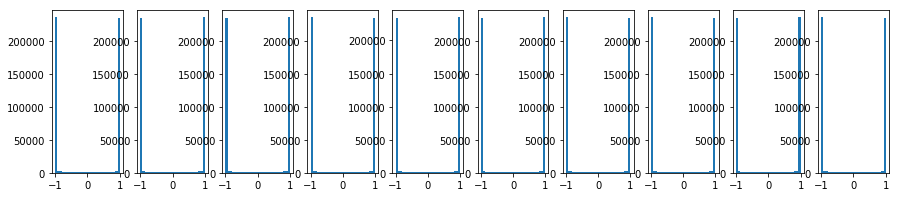

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,3)


def big_random_init(fan_in, fan_out):
    return 1 * np.random.randn(fan_in, fan_out)

hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, big_random_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))
    
# Plot the results
plt.figure()
plt.subplot(121)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distribution
plt.figure()
for i, H in hidden_layer_acts.items():
    plt.subplot(1, len(hidden_layer_acts), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

Notice that almost all neurons completely saturated to either -1 or 1 in every layer. This means gradients will be all zero and we won't be able to perform any learning on this network.

## Xavier Initialization
So what is this saying? Normally random distributed numbers do not work with deep learning weight initialization. A good rule of thumb is to try Xaiver initialization from the paper *Xiaver Initialization (Glorot et al. 2010)*. 

```python
W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) 
```

Hidden layer 1 had mean 0.000078 and std 0.627422
Hidden layer 2 had mean -0.000466 and std 0.486087
Hidden layer 3 had mean -0.000066 and std 0.408522
Hidden layer 4 had mean 0.000266 and std 0.357302
Hidden layer 5 had mean 0.000371 and std 0.320092
Hidden layer 6 had mean 0.000447 and std 0.293146
Hidden layer 7 had mean 0.000247 and std 0.271269
Hidden layer 8 had mean -0.000204 and std 0.256240
Hidden layer 9 had mean -0.000225 and std 0.242764
Hidden layer 10 had mean 0.000805 and std 0.230877


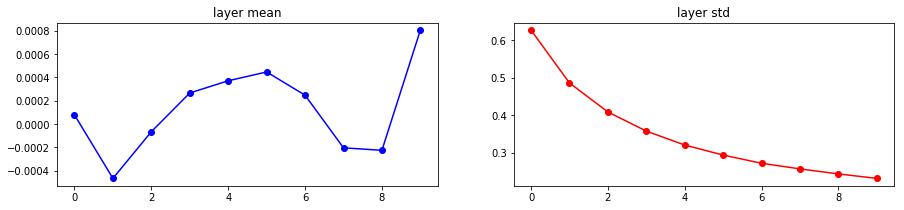

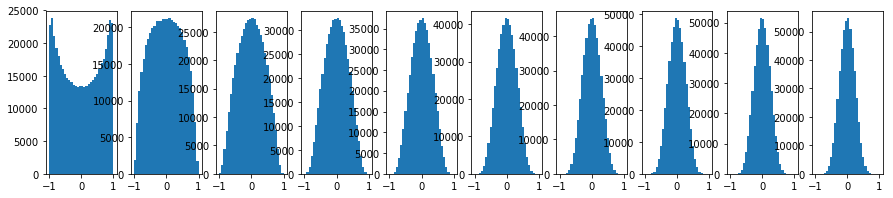

In [3]:
def xavier_init(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)

hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, xavier_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))
    
# Plot the results
plt.figure()
plt.subplot(121)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distribution
plt.figure()
for i, H in hidden_layer_acts.items():
    plt.subplot(1, len(hidden_layer_acts), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

Now everything is nice and normally distributed!